<div style = "text-align : center;"> 
<img src ="OneDrive\Bureau\interships tasks\Encryptix Logo.png" alt = "Encryptix LOgo"  style = "width : 300 px ; ">
</div>

<h1 style = "text-align : center; color : red;"> Movie Rating Predection With Python </h1>

# Introduction 
The Movie Rating Prediction project aims to predict the rating of a movie based on features such as genre, director, and actors. By analyzing historical movie data, we can build a model that estimates the ratings given to movies by users or critics. This project involves data analysis, preprocessing, feature engineering, and machine learning modeling techniques to understand the factors influencing movie ratings and to develop a model that accurately predicts these rating

# Key points
1.Data Collection and Exploration: Gather historical movie data, understand its structure, and perform exploratory data analysis (EDA). <br>
2.Data Preprocessing: Handle missing values, convert data types, and encode categorical features. <br>
3.Feature Engineering: Create new features or modify existing ones to improve model performance. <br>
4.Model Building: Apply regression techniques to develop a model that predicts movie ratings.<br>
5.Model Evaluation: Assess the model's performance using appropriate metrics.<br>
6.Visualisation : Make Some Graphic Insights 
6.Insights and Conclusions: Draw insights from the analysis and model predictions.<br>


# 1.Data Collection and Exploration 

In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 

path = "OneDrive\Bureau\interships tasks\Datasets CodSoft intership\IMDb Movies India.csv"
data = pd.read_csv(path, encoding = 'latin1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [18]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [24]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


# 2. Data Preprocessing 

In [29]:
# Replace the NAN Rating Column with the mean values
imputer = SimpleImputer(strategy='mean')
data["Rating"] = imputer.fit_transform(data[['Rating']])

# Replace The Genre Value with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
data['Genre'] = imputer_cat.fit_transform(data[['Genre']]).ravel()

# Replace the year column with the most frequent value
data['Year'] = imputer_cat.fit_transform(data[['Year']]).ravel()

# Convert all the values of Duration Column to str
data["Duration"] = data["Duration"].astype(str)

# Delete The text value "min" and transform this column as a float
data["Duration"] = data["Duration"].str.replace('min', '', regex=False).astype(float)

# Replace the duration column with mean values and convert back to integer
data['Duration'] = imputer.fit_transform(data[['Duration']]).ravel().round()
data['Duration'] = data['Duration'].astype(int).astype(str) + ' min'

# Replace the Director with the most frequent values
data['Director'] = imputer_cat.fit_transform(data[['Director']]).ravel()

# Replace The Actor 1 with the most frequent values
data['Actor 1'] = imputer_cat.fit_transform(data[['Actor 1']]).ravel()

# Replace The Actor 2 with the most frequent values
data['Actor 2'] = imputer_cat.fit_transform(data[['Actor 2']]).ravel()

# Replace The Actor 3 with the most frequent values
data['Actor 3'] = imputer_cat.fit_transform(data[['Actor 3']]).ravel()

# Handle 'Votes' column: Convert to numeric and drop rows with NaN
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data.dropna(subset=['Votes'], inplace=True)

# Encoding Categorical Features
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data['Director'] = label_encoder.fit_transform(data['Director'])
data['Actor 1'] = label_encoder.fit_transform(data['Actor 1'])
data['Actor 2'] = label_encoder.fit_transform(data['Actor 2'])
data['Actor 3'] = label_encoder.fit_transform(data['Actor 3'])

# Vérifier les types de données et le contenu des colonnes
print(data.dtypes)
print(data.head())


Name         object
Year         object
Duration     object
Genre         int32
Rating      float64
Votes       float64
Director      int32
Actor 1       int32
Actor 2       int32
Actor 3       int32
dtype: object
                                 Name    Year Duration  Genre  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min    245     7.0    8.0   
3                             #Yaaram  (2019)  110 min    187     4.4   35.0   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min    162     4.7  827.0   
8                  ?: A Question Mark  (2012)   82 min    335     5.6  326.0   
9                            @Andheri  (2014)  116 min     30     4.0   11.0   

   Director  Actor 1  Actor 2  Actor 3  
1       719     1646     2532      326  
3      1569     1464      798     2267  
5      1798      470       73     2162  
8       147     2322     1317     1060  
9       450      367      632      497  


# 3.Feature Engineering

In [34]:
# Combine Actor columns into a single feature
data['Actors'] = data['Actor 1'] + data['Actor 2'] + data['Actor 3']
data.drop(columns=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)



# 4.Model Building &  Data Preprocesseing

In [39]:
data["Duration"] = data["Duration"].astype(str)
data["Duration"] = data["Duration"].str.replace("min","")
X = data.drop(columns=["Name", "Rating", "Year"])
y = data["Rating"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



# 5.Model Evaluation

In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.810571603300939
R^2 Score: 0.01538529602643901


# 6.Visualisation 

C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


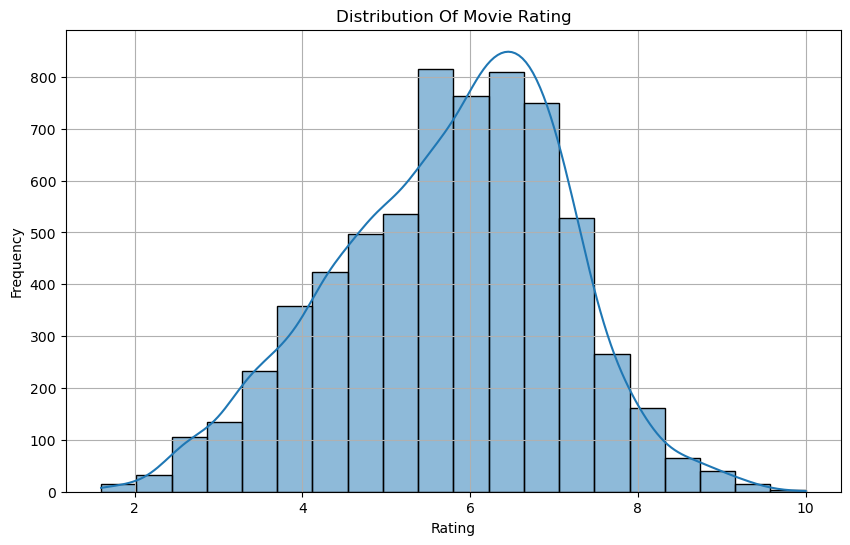

In [52]:
#Distribution Of rating
plt.figure(figsize=(10, 6))
sns.histplot(data["Rating"], bins = 20 , kde = True  )
plt.title("Distribution Of Movie Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

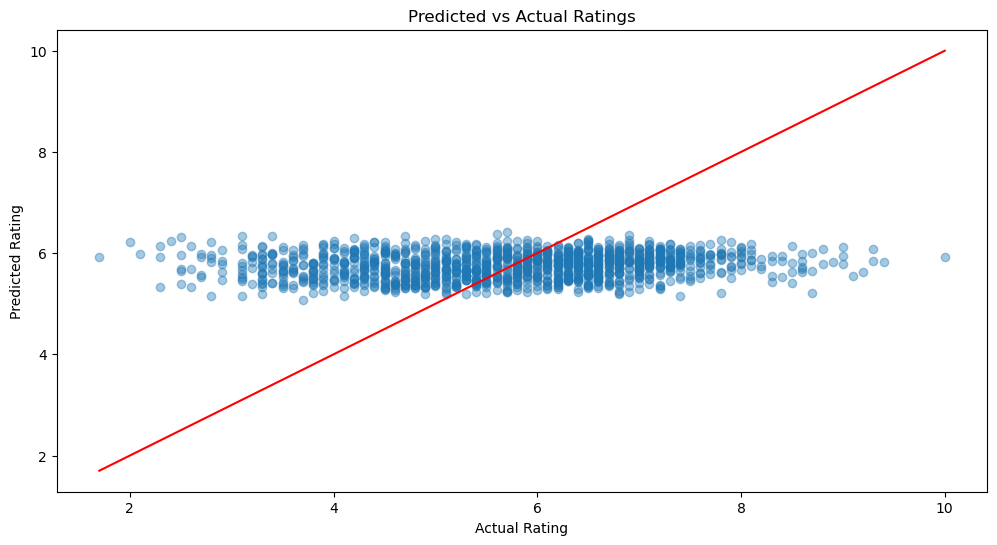

In [56]:
#Scatter plot of predected vs actual values
plt.figure(figsize=(12, 6 ) )
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


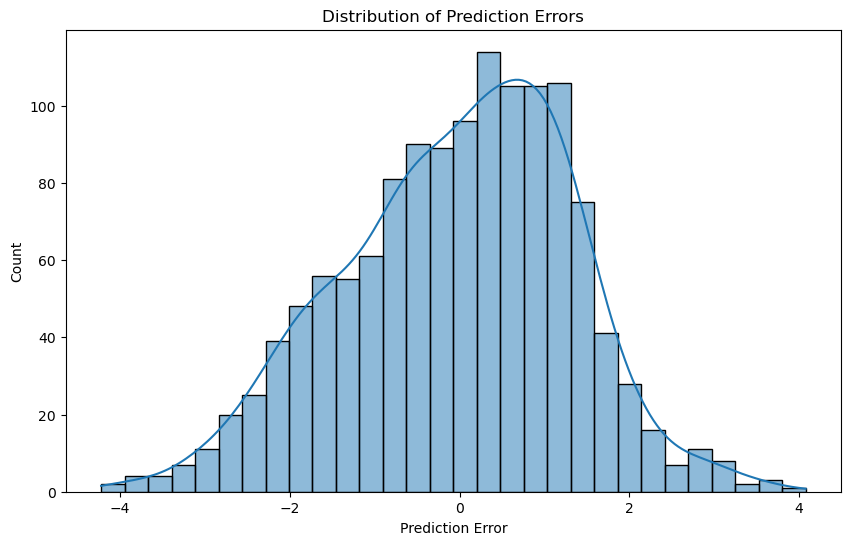

In [59]:
# Distribution of errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors")
plt.show()